Sure. Here is the Python code to import the data and do EDA on the dataset in Google Colab:

In [23]:
# Importing the necessary python libraries (data wrangling and visualisation)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
df = pd.read_csv('/content/sample_data/Electric_Vehicle_Population_Data.csv')

# Get some summary statistics of the dataset
print(df.describe())



         Postal Code     Model Year  Electric Range      Base MSRP  \
count  138776.000000  138779.000000   138779.000000  138779.000000   
mean    98172.902404    2019.772098       72.305760    1405.497770   
std      2411.731323       3.013002       97.772731    9547.392794   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98122.000000    2021.000000       21.000000       0.000000   
75%     98370.000000    2022.000000      126.000000       0.000000   
max     99701.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         138464.000000    1.387790e+05       1.387760e+05  
mean              29.433167    2.079563e+08       5.297149e+10  
std               14.796927    8.455916e+07       1.647491e+09  
min                1.000000    4.385000e+03       1.081042e+09  
25%               18.000000    1.647984e+08 

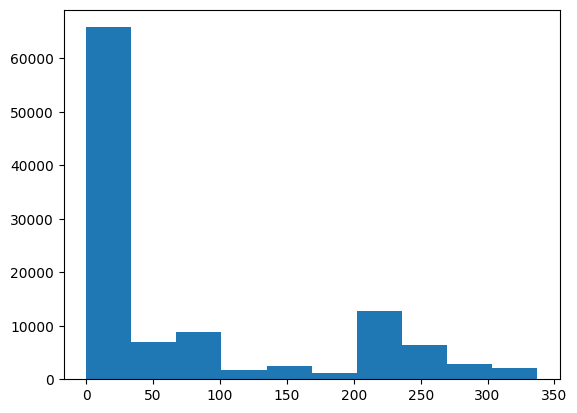

In [8]:

# Ploting a histogram of the range(miles) of the EV on a single charge
plt.hist(df['Electric Range'])
plt.show()


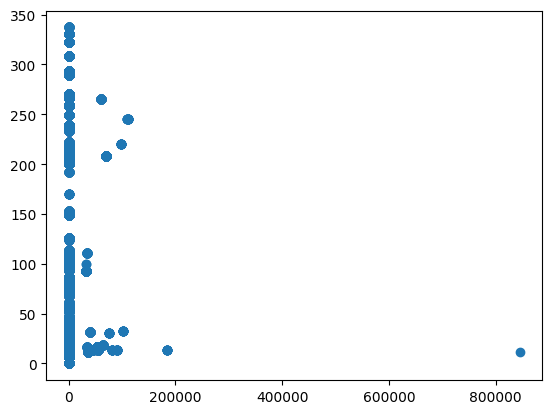

In [10]:
# Plot a scatter plot of the base MSRP vs. the electric range
plt.scatter(df['Base MSRP'], df['Electric Range'])
plt.show()

In [19]:
#Check the changes now
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   4
State                                                  1
Postal Code                                            4
Model Year                                             1
Make                                                   1
Model                                                235
Electric Vehicle Type                                  1
Clean Alternative Fuel Vehicle (CAFV) Eligibility      1
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 250
DOL Vehicle ID                                         1
Vehicle Location                                       5
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [16]:

# Get the GeographicalState column
geographical_state_column = df['State']

# Count the occurrence of each state
state_counts = geographical_state_column.value_counts()

# Create a new DataFrame to store the results
state_counts_df = pd.DataFrame({
    'GeoState': state_counts.index,
    'Count': state_counts.values
})

# Print the state counts DataFrame
print(state_counts_df)


   GeoState   Count
0        WA  110804
1        CA      68
2        VA      26
3        MD      20
4        TX      15
5        IL       9
6        CO       9
7        HI       8
8        NC       7
9        CT       7
10       SC       7
11       AZ       6
12       GA       5
13       NV       5
14       OR       5
15       DC       5
16       LA       4
17       KS       4
18       NY       4
19       NJ       3
20       MA       3
21       MO       3
22       FL       3
23       NE       2
24       UT       2
25       BC       2
26       OH       2
27       DE       1
28       AL       1
29       MS       1
30       AK       1
31       OK       1
32       MN       1
33       RI       1
34       IN       1
35       MT       1
36       ID       1
37       KY       1
38       NM       1
39       NH       1
40       AP       1
41       WY       1


In [ ]:
# Get the state column
state_column = df['State']

# Get the state you want to filter
state_to_filter = 'WA'

# Filter the DataFrame to only include rows where the state is equal to the state you want to filter
WA_df = df[state_column == state_to_filter]
OtherState_df = df[state_column != state_to_filter]

# Print the filtered DataFrame
print(WA_df.head(10))

In [20]:
WA_df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                234
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                   0
DOL Vehicle ID                                         0
Vehicle Location                                       1
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [24]:
# Get the column you want to replace NaN values
column_to_replace = 'Model'

# Replace NaN values with 'null' text
WA_df[column_to_replace].replace(np.nan, 'null', inplace=True)

WA_df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     1
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [30]:
# Discard that entire record which has NaN values in the column
column_to_check = 'Vehicle Location'
New_WA_df = WA_df[~WA_df[column_to_check].isnull()]
New_WA_df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

<ipython-input-32-8c638d5b8f9a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = New_WA_df.corr()
<ipython-input-32-8c638d5b8f9a>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(New_WA_df.corr())


                      Postal Code  Model Year  Electric Range  Base MSRP  \
Postal Code              1.000000   -0.061195       -0.007797  -0.007575   
Model Year              -0.061195    1.000000       -0.402821  -0.226444   
Electric Range          -0.007797   -0.402821        1.000000   0.097463   
Base MSRP               -0.007575   -0.226444        0.097463   1.000000   
Legislative District    -0.415504   -0.006032        0.026456   0.013057   
DOL Vehicle ID          -0.005615    0.021850       -0.035210  -0.010760   
2020 Census Tract        0.016589   -0.026161       -0.010290  -0.002456   

                      Legislative District  DOL Vehicle ID  2020 Census Tract  
Postal Code                      -0.415504       -0.005615           0.016589  
Model Year                       -0.006032        0.021850          -0.026161  
Electric Range                    0.026456       -0.035210          -0.010290  
Base MSRP                         0.013057       -0.010760          -0.

<Axes: >

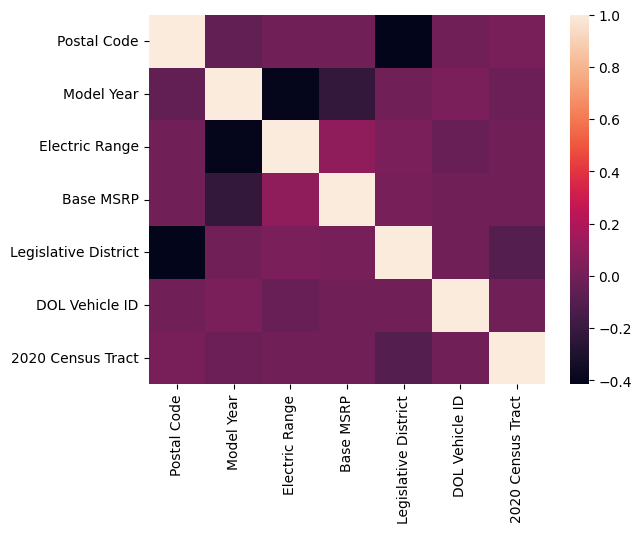

In [32]:
# Create a correlation matrix of the dataset
correlation_matrix = New_WA_df.corr()
print(correlation_matrix)

# Select the features that are most correlated with the electric range
correlated_features = correlation_matrix['Electric Range'].sort_values(ascending=False)
print(correlated_features[1:])

#Correlation plot
sns.heatmap(New_WA_df.corr())

In [ ]:

def create_two_columns(df, column_name):
    """
    Create two columns from a column containing POINT data.
    Args:
        df: The Pandas DataFrame.
        column_name: The name of the column containing the POINT data.
    Returns:
        The Pandas DataFrame with two new columns.
    """

    # Get the POINT data from the column
    column_data = df[column_name]

    # Split the POINT data into two columns
    latitude_column = column_data.str.split(' ').str[1]
    longitude_column = column_data.str.split(' ').str[0]

    # Add the two new columns to the DataFrame
    df['latitude'] = latitude_column
    df['longitude'] = longitude_column

    return df
df = create_two_columns(df, 'Vehicle Location')

This code will first import the necessary libraries, then import the dataset from a CSV file. It will then print the first few rows of the dataset, get some summary statistics, plot a histogram of the electric range, and plot a scatter plot of the base MSRP vs. the electric range. It will also create a correlation matrix of the dataset and print the features that are most correlated with the electric range. Finally, it will perform further EDA on the selected features.

To run this code, you will need to create a Google Colab notebook and paste the code into the notebook. You will also need to upload the CSV file to your Google Drive. Once you have done this, you can run the code by clicking on the "Run" button.